<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/7_2_Google_Colab_algoritmos_de_extracci%C3%B3n_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

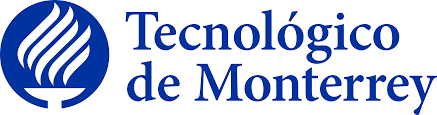

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 7.2 Google Colab algoritmos de extracción de características

**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

En el Collab de Harris Detector, se sugiere que se hagan pruebas con imágenes propias que el equipo decida usar. La idea  es escoger un objeto y tomar fotos con diferentes tipos de iluminación (bajo el sol, en un lugar oscuro) y bajo diferentes ángulos para analizar el comportamiento del detector de Harris bajo diferentes settings

# 7. Harris Edge & Corner Detection

## Table of Contents
1. [Libraries](#libraries)
2. [Color image to Grayscale conversion](#grayscale)
3. [Spatial derivative calculation](#spatial)
4. [Structure tensor setup](#tensor)
5. [Harris response calculation](#response)
6. [Find edges and corners using R](#find)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [2]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve
from skimage import io

## 1. Color to Grayscale <a class="anchor" id="grayscale" ></a>

In [5]:
url_chess = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/chessboard.jpg?raw=true'

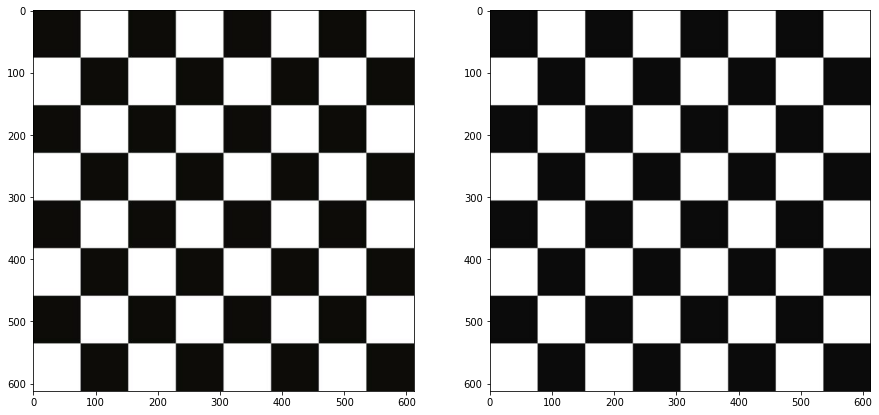

In [16]:
#img = cv2.imread('data/chessboard.jpg')
#img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = io.imread(url_chess)
img_color = cv2.cvtColor(io.imread(url_chess), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(io.imread(url_chess), cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

## 2. Spatial derivative calculation <a class="anchor" id="spatial" ></a>

In [17]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(img_gray)
I_y = gradient_y(img_gray)

## 3. Structure tensor setup <a class="anchor" id="tensor" ></a>

In [18]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


Ixx = convolve(I_x**2, gaussian_kernel(3, 1))
Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
Iyy = convolve(I_y**2, gaussian_kernel(3, 1))

## 4. Harris response calculation <a class="anchor" id="response" ></a>

In [19]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2

# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [20]:
img_gray.shape

(612, 612)

In [21]:
window_size = 3
offset = window_size//2
width, height = img_gray.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [22]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

## 5. Find edges and corners using R <a class="anchor" id="find" ></a>

In [23]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

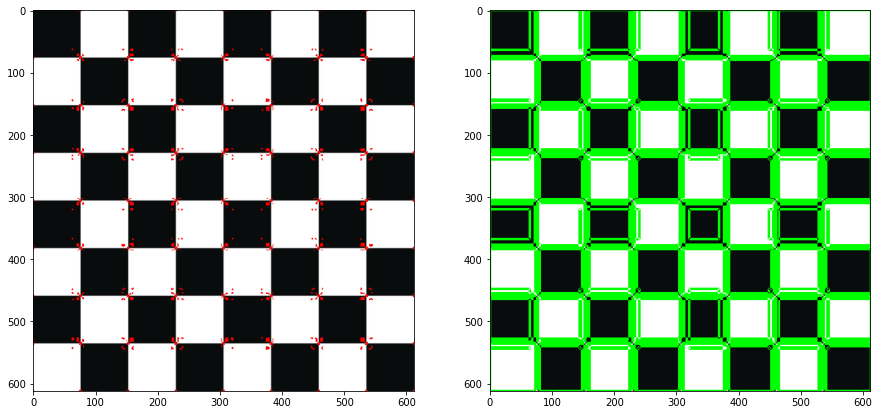

In [24]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")

## Caso de equipo

In [26]:
url_front = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/JM_Front.jpg?raw=true'
url_up = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/JM_Up.jpg?raw=true'
url_sheer = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/JM_Sheer.jpg?raw=true'
url_angle = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/JM_Angle.jpg?raw=true'

In [28]:
url_list = [url_front, url_up, url_sheer, url_angle]

In [29]:
img_front = cv2.cvtColor(io.imread(url_front), cv2.COLOR_BGR2GRAY)
img_up = cv2.cvtColor(io.imread(url_up), cv2.COLOR_BGR2GRAY)
img_sheer = cv2.cvtColor(io.imread(url_sheer), cv2.COLOR_BGR2GRAY)
img_angle = cv2.cvtColor(io.imread(url_angle), cv2.COLOR_BGR2GRAY)

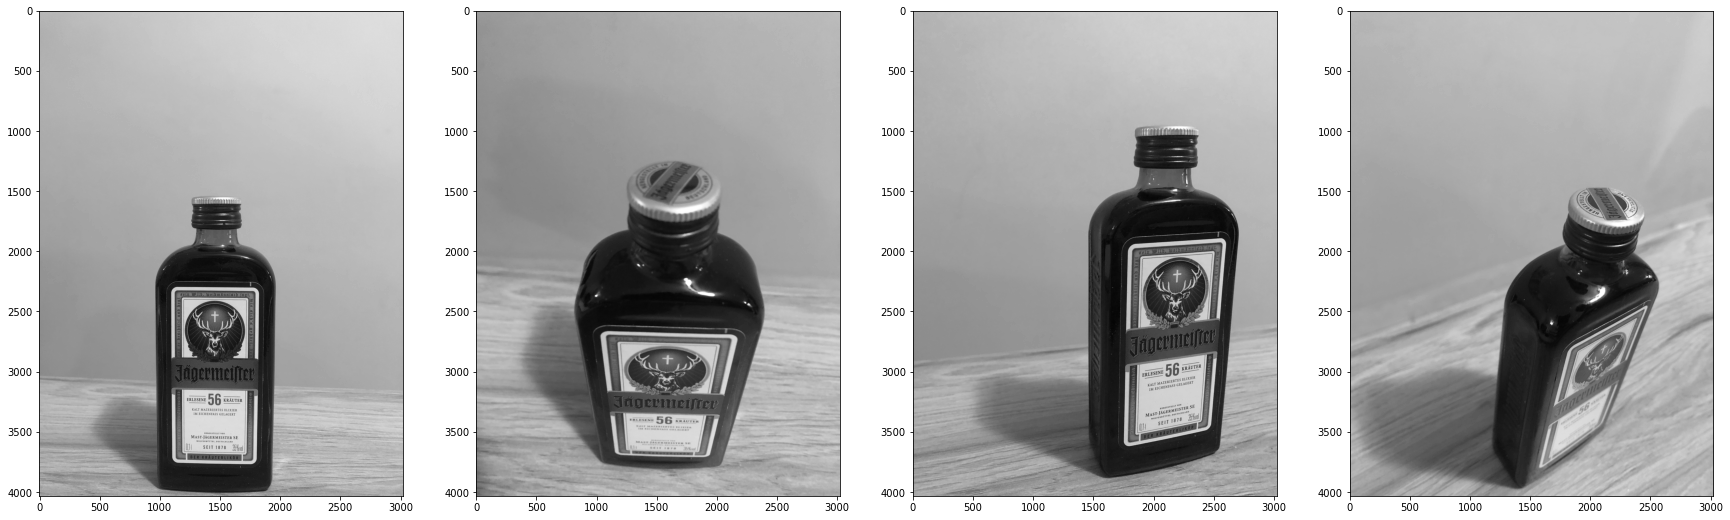

In [39]:
plt.figure(figsize=(30,10))

for i in range(len(url_list)):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(io.imread(url_list[i]), cv2.COLOR_BGR2GRAY), cmap = "gray")
  